In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from train import train_model
from dataset import train_data, test_data, decode_img
from model import generator, Discriminator

2022-03-20 05:45:29.909734: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-20 05:45:29.992450: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-20 05:45:29.993140: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-20 05:45:29.994303: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [2]:
TRAIN = "../input/pix2pix-dataset/facades/facades/train/*"
TEST = "../input/pix2pix-dataset/facades/facades/test/*"

In [3]:
train_ds = train_data(TRAIN)
test_ds = test_data(TEST)

2022-03-20 05:45:33.145622: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


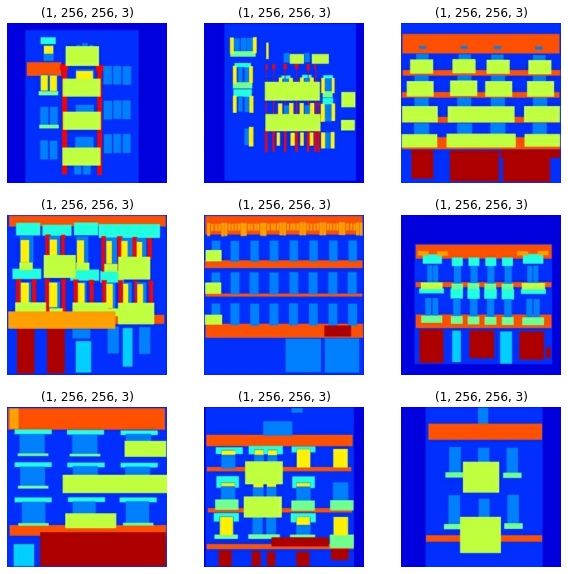

In [4]:
plt.figure(figsize=(10, 10))
counter = 0
for sat, map_ in test_ds:
    plt.subplot(3, 3, counter + 1)
    plt.imshow(np.squeeze(sat) * 0.5 + 0.5)
    plt.title(sat.shape)
    plt.axis("off")
    counter+=1
    if counter==9: break

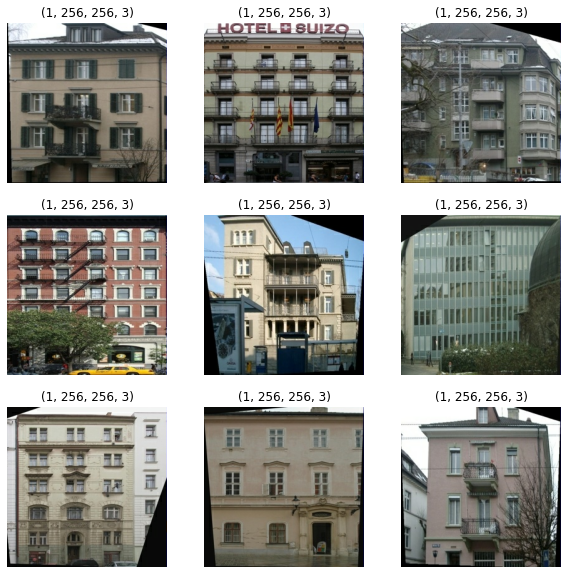

In [5]:
plt.figure(figsize=(10, 10))
counter = 0
for sat, map_ in test_ds:
    plt.subplot(3, 3, counter + 1)
    plt.imshow(np.squeeze(map_)* 0.5 + 0.5)
    plt.title(sat.shape)
    plt.axis("off")
    counter+=1
    if counter==9: break

In [6]:
tf.config.run_functions_eagerly(True)
train_model(100, 2000, train_ds)

2022-03-20 05:45:35.645845: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


Epochs:0 || Generator_Loss: 39.340 || Discriminator_Loss: 0.236
Epochs:1 || Generator_Loss: 50.556 || Discriminator_Loss: 0.173
Epochs:2 || Generator_Loss: 31.650 || Discriminator_Loss: 0.772
Epochs:3 || Generator_Loss: 43.309 || Discriminator_Loss: 0.124
Epochs:4 || Generator_Loss: 32.896 || Discriminator_Loss: 0.443
Epochs:5 || Generator_Loss: 30.680 || Discriminator_Loss: 1.604
Epochs:6 || Generator_Loss: 34.243 || Discriminator_Loss: 0.134
Epochs:7 || Generator_Loss: 35.073 || Discriminator_Loss: 0.289
Epochs:8 || Generator_Loss: 42.775 || Discriminator_Loss: 0.300
Epochs:9 || Generator_Loss: 45.693 || Discriminator_Loss: 0.039
Epochs:10 || Generator_Loss: 31.253 || Discriminator_Loss: 1.272
Epochs:11 || Generator_Loss: 30.743 || Discriminator_Loss: 0.337
Epochs:12 || Generator_Loss: 26.799 || Discriminator_Loss: 0.772
Epochs:13 || Generator_Loss: 31.828 || Discriminator_Loss: 0.171
Epochs:14 || Generator_Loss: 31.002 || Discriminator_Loss: 0.354
Epochs:15 || Generator_Loss: 23.461

2022-03-20 11:58:44.707644: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [7]:
def denormalize(img):
    img = (img + 1) * 127.5
    return img

In [8]:
Generator = tf.keras.models.load_model("/kaggle/working/generator.h5")

/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


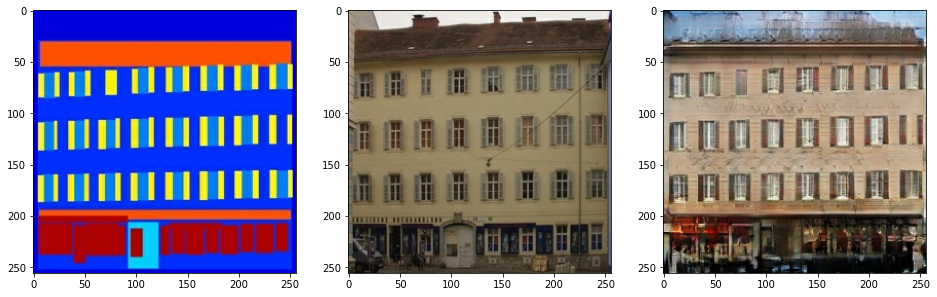

In [9]:
x, y = decode_img("../input/pix2pix-dataset/facades/facades/test/102.jpg")
preds = Generator.predict(tf.expand_dims(x, axis=0))

plt.figure(figsize=(16,9))
plt.subplot(131), plt.imshow(denormalize(x).numpy().astype('uint8'))
plt.subplot(132), plt.imshow(denormalize(y).numpy().astype('uint8'))
plt.subplot(133), plt.imshow(np.squeeze(denormalize(preds)).astype('uint8'))
plt.show()

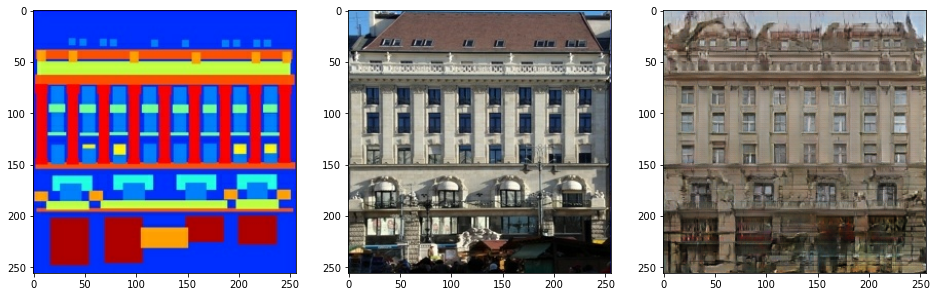

In [10]:
x, y = decode_img("../input/pix2pix-dataset/facades/facades/test/103.jpg")
preds = Generator.predict(tf.expand_dims(x, axis=0))

plt.figure(figsize=(16,9))
plt.subplot(131), plt.imshow(denormalize(x).numpy().astype('uint8'))
plt.subplot(132), plt.imshow(denormalize(y).numpy().astype('uint8'))
plt.subplot(133), plt.imshow(np.squeeze(denormalize(preds)).astype('uint8'))
plt.show()

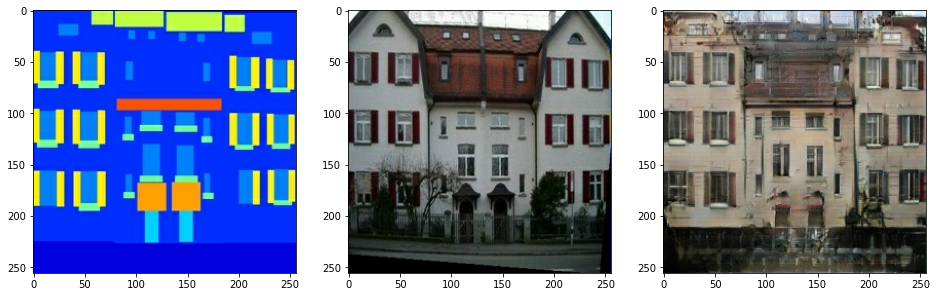

In [11]:
x, y = decode_img("../input/pix2pix-dataset/facades/facades/test/19.jpg")
preds = Generator.predict(tf.expand_dims(x, axis=0))

plt.figure(figsize=(16,9))
plt.subplot(131), plt.imshow(denormalize(x).numpy().astype('uint8'))
plt.subplot(132), plt.imshow(denormalize(y).numpy().astype('uint8'))
plt.subplot(133), plt.imshow(np.squeeze(denormalize(preds)).astype('uint8'))
plt.show()

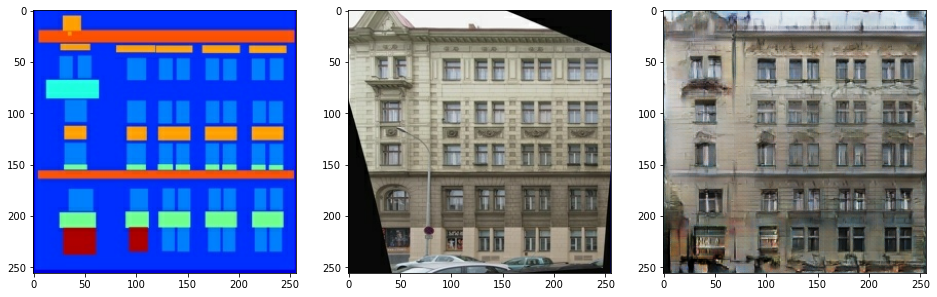

In [12]:
x, y = decode_img("../input/pix2pix-dataset/facades/facades/test/27.jpg")
preds = Generator.predict(tf.expand_dims(x, axis=0))

plt.figure(figsize=(16,9))
plt.subplot(131), plt.imshow(denormalize(x).numpy().astype('uint8'))
plt.subplot(132), plt.imshow(denormalize(y).numpy().astype('uint8'))
plt.subplot(133), plt.imshow(np.squeeze(denormalize(preds)).astype('uint8'))
plt.show()